# Explore the .dcm files of BDIS-DDSM

- [DICOM standard](https://dicom.innolitics.com/ciods/cr-image/general-series/00200060)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator
import pandas            as pd
import numpy             as np
import cv2
import pydicom
import os
import seaborn as sns
from skimage.segmentation import mark_boundaries

from pathlib             import Path

---


In [5]:
P00001_dcm = pydicom.dcmread("../data/raw_data/Mass/Train/Mass-Training_P_00001_LEFT_CC_FULL.dcm")
P00001_mask_dcm = pydicom.dcmread("../data/raw_data/Mass/Train/Mass-Training_P_00001_LEFT_CC_MASK_1.dcm")
P00001_crop_dcm = pydicom.dcmread("../data/raw_data/Mass/Train/Mass-Training_P_00001_LEFT_CC_CROP_1.dcm")

P00444_dcm = pydicom.dcmread("/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Mass/Train_extracted/Mass-Training_P_00444_LEFT_CC_FULL.dcm")
P00444_mask_dcm = pydicom.dcmread("/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Mass/Train_extracted/Mass-Training_P_00444_LEFT_CC_MASK_1.dcm")

P00051_dcm = pydicom.dcmread("/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Mass/Train_extracted/Mass-Training_P_00051_LEFT_MLO_FULL.dcm")
P00051_mask_dcm = pydicom.dcmread("/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Mass/Train_extracted/Mass-Training_P_00051_LEFT_MLO_MASK_1.dcm")

P00001_arr = P00001_dcm.pixel_array
P00001_mask_arr = P00001_mask_dcm.pixel_array
P00001_crop_arr = P00001_crop_dcm.pixel_array

P00444_arr = P00444_dcm.pixel_array
P00444_mask_arr = P00444_mask_dcm.pixel_array

P00051_arr = P00051_dcm.pixel_array
P00051_mask_arr = P00051_mask_dcm.pixel_array

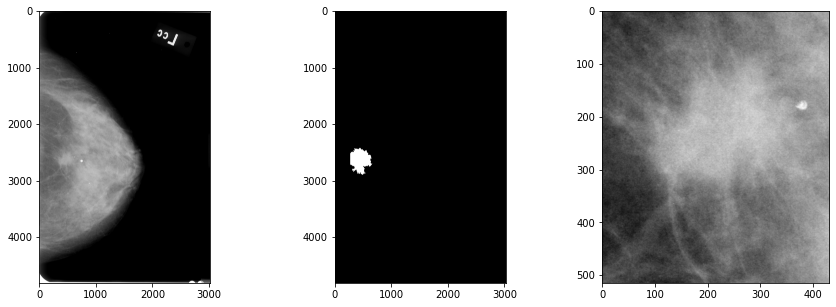

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax[0].imshow(P00001_arr, cmap="gray")
ax[1].imshow(P00001_mask_arr, cmap="gray")
ax[2].imshow(P00001_crop_arr, cmap="gray")

In [22]:
cv2.imwrite("../writeups/medium_article/Mass-Training_P_00051_LEFT_MLO_MASK_1.png", P00051_mask_arr)

True

In [76]:
test = np.ma.masked_where(P00001_mask_arr == 0, P00001_mask_arr)

In [77]:
test

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=999999,
  dtype=uint8)

In [72]:
P00001_img = cv2.imread("../writeups/medium_article/Mass-Training_P_00001_LEFT_CC_FULL.png", cv2.IMREAD_GRAYSCALE)
P00001_mask = cv2.imread("../writeups/medium_article/Mass-Training_P_00001_LEFT_CC_MASK_1.png", cv2.IMREAD_GRAYSCALE)

P00051_img = cv2.imread("../writeups/medium_article/Mass-Training_P_00051_LEFT_MLO_FULL.png", cv2.IMREAD_GRAYSCALE)
P00051_mask = cv2.imread("../writeups/medium_article/Mass-Training_P_00051_LEFT_MLO_MASK_1.png", cv2.IMREAD_GRAYSCALE)

P00444_img = cv2.imread("../writeups/medium_article/Mass-Training_P_00444_LEFT_CC_FULL.png", cv2.IMREAD_GRAYSCALE)
P00444_mask = cv2.imread("../writeups/medium_article/Mass-Training_P_00444_LEFT_CC_MASK_1.png", cv2.IMREAD_GRAYSCALE)

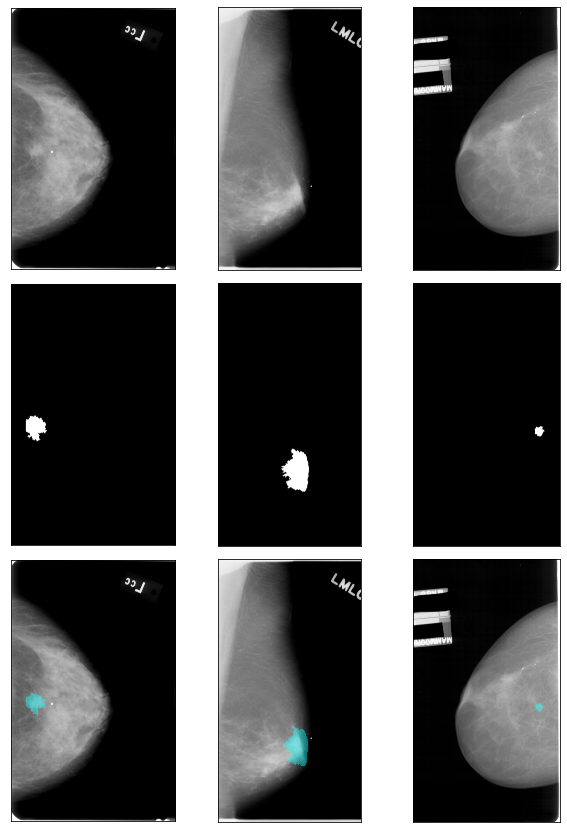

In [89]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 15))

ax[0][0].imshow(P00001_arr, cmap="gray")
ax[1][0].imshow(P00001_mask_arr, cmap="gray")

ax[0][1].imshow(P00051_arr, cmap="gray")
ax[1][1].imshow(P00051_mask_arr, cmap="gray")

ax[0][2].imshow(P00444_arr, cmap="gray")
ax[1][2].imshow(P00444_mask_arr, cmap="gray")

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

bwr_cmap = plt.get_cmap("bwr")
true_cmap = truncate_colormap(cmap=bwr_cmap, minval=0.5, maxval=1.0)
pred_cmap = truncate_colormap(cmap=bwr_cmap, minval=0.5, maxval=0)

P00001_mask_alpha = np.ma.masked_where(P00001_mask_arr == 0, P00001_mask_arr)
P00051_mask_alpha = np.ma.masked_where(P00051_mask_arr == 0, P00051_mask_arr)
P00444_mask_alpha = np.ma.masked_where(P00444_mask_arr == 0, P00444_mask_arr)

ax[2][0].imshow(P00001_arr, cmap="gray")
ax[2][0].imshow(P00001_mask_alpha, cmap="cool", alpha=0.4)
# ax[2][0].imshow(P00001_mask_arr, cmap=true_cmap, alpha=0.4)

ax[2][1].imshow(P00051_arr, cmap="gray")
ax[2][1].imshow(P00051_mask_alpha, cmap="cool", alpha=0.4)
# ax[2][1].imshow(P00051_mask_arr, cmap=true_cmap, alpha=0.7)

ax[2][2].imshow(P00444_arr, cmap="gray")
ax[2][2].imshow(P00444_mask_alpha, cmap="cool", alpha=0.4)
# ax[2][2].imshow(P00444_mask_arr, cmap=true_cmap, alpha=0.4)

for i, ax in enumerate(fig.axes):
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

plt.subplots_adjust(wspace=0.2, 
                    hspace=0.05)
plt.tight_layout

plt.savefig("/Users/cleonwong/Google Drive/To-Share/mammogram_medium_article/Part1/show_mask.png", dpi=300, transparent=True)

## We only look at Mass-Training (patient IDs `P_00001` and `P_00004`)

- `P_00001` - malignant
- `P_00004` - benign

**Note:**
- `cropped image file path` and `ROI mask file path` are wrong.

In [8]:
df = pd.read_csv("../data/csv-description/Mass-Training-Description.csv")

# Rename columns
new_cols = [col.replace(" ", "_") for col in df.columns]
df.columns = new_cols

df = df.loc[df["patient_id"].isin(["P_01039"])]
# df = df.loc[df["abnormality id"] > 1]



df

FileNotFoundError: [Errno 2] No such file or directory: '../data/csv-description/Mass-Training-Description.csv'

In [5]:
for row in df.itertuples():
    print(row.ROI_mask_file_path)
    print(row.Index)

Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.108268213011361124203859148071588939106/1.3.6.1.4.1.9590.100.1.2.296736403313792599626368780122205399650/000001.dcm

0
Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188473874511440575807446266233629582526/1.3.6.1.4.1.9590.100.1.2.227955274711225756835838775062793186053/000001.dcm

1
Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000001.dcm

2
Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.342549219112801262604988012930063078769/1.3.6.1.4.1.9590.100.1.2.115134232113001553100559896703407510515/000001.dcm

3
Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.341142631111685501338932932302380583774/1.3.6.1.4.1.9590.100.1.2.12857366312625701203276284233604184846/000001.dcm

4


In [8]:
df2 = pd.read_csv("/Users/cleonwong/Desktop/Code/mammogram-cv/data/raw_data/csv-description/Mass-Training-Description-UPDATED.csv")

In [9]:
df2.isna().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
full_path                   0
crop_path                   0
mask_path                   0
dtype: int64

In [11]:
df2.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,full_path,crop_path,mask_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...,../data/raw_data/Mass/Train/Mass-Training_P_00...


In [12]:
for row in df2.itertuples():
    print(row.full_path)
    print(row.crop_path)
    print(row.mask_path)
    

../data/raw_data/Mass/Train/Mass-Training_P_00001_LEFT_CC_FULL.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00001_LEFT_CC_CROP_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00001_LEFT_CC_MASK_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00001_LEFT_MLO_FULL.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00001_LEFT_MLO_CROP_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00001_LEFT_MLO_MASK_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00004_LEFT_CC_FULL.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00004_LEFT_CC_CROP_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00004_LEFT_CC_MASK_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00004_LEFT_MLO_FULL.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00004_LEFT_MLO_CROP_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00004_LEFT_MLO_MASK_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00004_RIGHT_MLO_FULL.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00004_RIGHT_MLO_CROP_1.dcm
../data/raw_data/Mass/Train/Mass-T

../data/raw_data/Mass/Train/Mass-Training_P_00889_LEFT_CC_MASK_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00889_LEFT_MLO_FULL.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00889_LEFT_MLO_CROP_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00889_LEFT_MLO_MASK_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00891_RIGHT_CC_FULL.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00891_RIGHT_CC_CROP_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00891_RIGHT_CC_MASK_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00891_RIGHT_MLO_FULL.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00891_RIGHT_MLO_CROP_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00891_RIGHT_MLO_MASK_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00892_LEFT_CC_FULL.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00892_LEFT_CC_CROP_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00892_LEFT_CC_MASK_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_00892_LEFT_MLO_FULL.dcm
../data/raw_data/Mass/Train/Mas

../data/raw_data/Mass/Train/Mass-Training_P_01621_RIGHT_CC_MASK_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_01621_RIGHT_MLO_FULL.dcm
../data/raw_data/Mass/Train/Mass-Training_P_01621_RIGHT_MLO_CROP_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_01621_RIGHT_MLO_MASK_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_01630_RIGHT_MLO_FULL.dcm
../data/raw_data/Mass/Train/Mass-Training_P_01630_RIGHT_MLO_CROP_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_01630_RIGHT_MLO_MASK_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_01632_LEFT_CC_FULL.dcm
../data/raw_data/Mass/Train/Mass-Training_P_01632_LEFT_CC_CROP_2.dcm,../data/raw_data/Mass/Train/Mass-Training_P_01632_LEFT_CC_CROP_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_01632_LEFT_CC_MASK_2.dcm,../data/raw_data/Mass/Train/Mass-Training_P_01632_LEFT_CC_MASK_1.dcm
../data/raw_data/Mass/Train/Mass-Training_P_01632_LEFT_CC_FULL.dcm
../data/raw_data/Mass/Train/Mass-Training_P_01632_LEFT_CC_CROP_2.dcm,../data/raw_data/Mass/Train/M

---
## Explore calcification

### Combining .csv for calc

In [9]:
# Calc
# ----

calc_train_df = pd.read_csv("../data/raw_data/csv-description/Calc-Training-Description.csv")
calc_test_df = pd.read_csv("../data/raw_data/csv-description/Calc-Test-Description.csv")

calc_all_df = pd.concat(objs=[calc_train_df, calc_test_df])

# Remove spaces in columns name
calc_all_df.columns = calc_all_df.columns.str.replace(' ','_')

# Drop path columns
calc_all_df.drop(columns=["image_file_path", "cropped_image_file_path", "ROI_mask_file_path"], inplace=True)

# Create identifier column for calc
calc_all_df.insert(loc=0, column="identifier", value=np.nan)
calc_all_df["identifier"] = calc_all_df.apply(lambda x: "_".join([x["patient_id"], x["left_or_right_breast"], x["image_view"]]), axis=1)

# Mass
# ----
mass_all_df = pd.read_csv("../data/csv/Mass_all.csv")

print(calc_all_df.shape)
print(mass_all_df.shape)

(1872, 12)
(1696, 12)


In [10]:
print(len(calc_all_df["identifier"].unique()))
print(len(mass_all_df["identifier"].unique()))

1511
1592


In [11]:
all_df = pd.concat(objs=[calc_all_df, mass_all_df])

In [12]:
all_df.to_csv("/Users/cleonwong/Desktop/Code/mammogram-cv/data/csv/mass_calc_all.csv", index=False)

### There are 71 Patient IDs with both mass and calc abnormalities

In [86]:
calc_set = set(calc_all_df["identifier"].unique())
mass_set = set(mass_all_df["identifier"].unique())

both_set = calc_set.intersection(mass_set)
len(both_set)

71

In [90]:
both_set

{'P_00016_LEFT_CC',
 'P_00016_LEFT_MLO',
 'P_00034_RIGHT_CC',
 'P_00034_RIGHT_MLO',
 'P_00041_LEFT_CC',
 'P_00041_LEFT_MLO',
 'P_00106_RIGHT_CC',
 'P_00106_RIGHT_MLO',
 'P_00202_RIGHT_CC',
 'P_00202_RIGHT_MLO',
 'P_00208_RIGHT_MLO',
 'P_00224_LEFT_CC',
 'P_00224_LEFT_MLO',
 'P_00385_RIGHT_CC',
 'P_00385_RIGHT_MLO',
 'P_00495_RIGHT_CC',
 'P_00495_RIGHT_MLO',
 'P_00510_LEFT_CC',
 'P_00510_LEFT_MLO',
 'P_00522_RIGHT_MLO',
 'P_00539_RIGHT_CC',
 'P_00539_RIGHT_MLO',
 'P_00573_RIGHT_MLO',
 'P_00591_RIGHT_MLO',
 'P_00601_LEFT_CC',
 'P_00601_LEFT_MLO',
 'P_00652_LEFT_CC',
 'P_00666_RIGHT_CC',
 'P_00666_RIGHT_MLO',
 'P_00673_RIGHT_MLO',
 'P_00678_LEFT_CC',
 'P_00710_RIGHT_CC',
 'P_00710_RIGHT_MLO',
 'P_00723_LEFT_MLO',
 'P_00734_RIGHT_MLO',
 'P_00814_LEFT_CC',
 'P_00814_LEFT_MLO',
 'P_00847_LEFT_MLO',
 'P_00906_LEFT_CC',
 'P_00906_LEFT_MLO',
 'P_00924_RIGHT_CC',
 'P_00969_LEFT_CC',
 'P_00969_LEFT_MLO',
 'P_01084_LEFT_CC',
 'P_01084_LEFT_MLO',
 'P_01152_RIGHT_CC',
 'P_01152_RIGHT_MLO',
 'P_01179

In [95]:
calc_all_df.head(50)

,identifier,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc_type,calc_distribution,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00005_RIGHT_CC,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005_RIGHT_MLO,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007_LEFT_CC,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007_LEFT_MLO,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008_LEFT_CC,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...
5,P_00008_LEFT_CC,P_00008,1,LEFT,CC,2,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_2/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_2/1.3.6.1.4.1.95...
6,P_00008_LEFT_CC,P_00008,1,LEFT,CC,3,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_3/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_3/1.3.6.1.4.1.95...
7,P_00008_LEFT_MLO,P_00008,1,LEFT,MLO,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00008_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00008_LEFT_MLO_1/1.3.6.1.4.1.9...
8,P_00008_LEFT_MLO,P_00008,1,LEFT,MLO,2,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00008_LEFT_MLO_2/1.3.6.1.4.1.9...,Calc-Training_P_00008_LEFT_MLO_2/1.3.6.1.4.1.9...
9,P_00008_LEFT_MLO,P_00008,1,LEFT,MLO,3,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00008_LEFT_MLO_3/1.3.6.1.4.1.9...,Calc-Training_P_00008_LEFT_MLO_3/1.3.6.1.4.1.9...


### Abnormality type

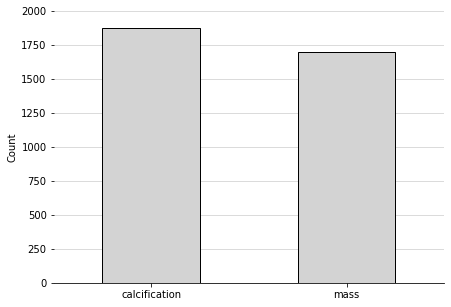

In [29]:
plot_df = all_df["abnormality_type"].value_counts()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
plot_df.plot.bar(ax=ax, color="#d3d3d3", edgecolor="black")

# ax.set_title("Distribution of pathology-abnormality_type.")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(b=True, which="major", axis="y", color="#d3d3d3", linestyle="-")
ax.grid(b=True, which="minor", axis="y", color="#e7e7e7", linestyle="dashed")
ax.set_ylabel("Count")
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=0, ha="center")
ax.yaxis.set_ticks(np.arange(0, 2250, 250))
# ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.patch.set_alpha(0)
ax.set_axisbelow(True)

plt.savefig("/Users/cleonwong/Google Drive/To-Share/mammogram_medium_article/Part1/calc_mass.png", dpi=300, transparent=True)

### Mammograms with >1 abnormalities

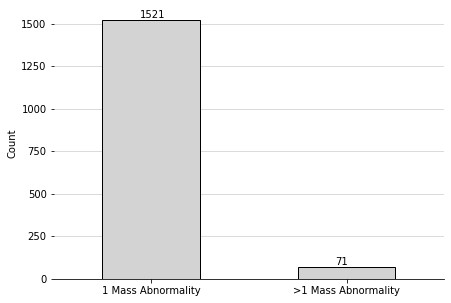

In [49]:
temp = all_df.loc[all_df["abnormality_type"] == "mass"]["identifier"].value_counts()

to_plot_dict = {"1 Mass Abnormality":0, ">1 Mass Abnormality":0}

for count in temp:
    if count > 1:
        to_plot_dict[">1 Mass Abnormality"] += 1
    if count == 1:
        to_plot_dict["1 Mass Abnormality"] += 1

to_plot_series = pd.Series(to_plot_dict)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
to_plot_series.plot.bar(ax=ax, color="#d3d3d3", edgecolor="black")

# Add values
for i, v in enumerate(to_plot_series):
    ax.text(x=(i-0.06), y=(v + 10), s=str(v), color="black")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(b=True, which="major", axis="y", color="#d3d3d3", linestyle="-")
ax.grid(b=True, which="minor", axis="y", color="#e7e7e7", linestyle="dashed")
ax.set_ylabel("Count")
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=0, ha="center")
ax.yaxis.set_ticks(np.arange(0, 1750, 250))
# ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.patch.set_alpha(0)
ax.set_axisbelow(True)

plt.savefig("/Users/cleonwong/Google Drive/To-Share/mammogram_medium_article/Part1/more_than_one_abnormality_plot.png", dpi=300, transparent=True)

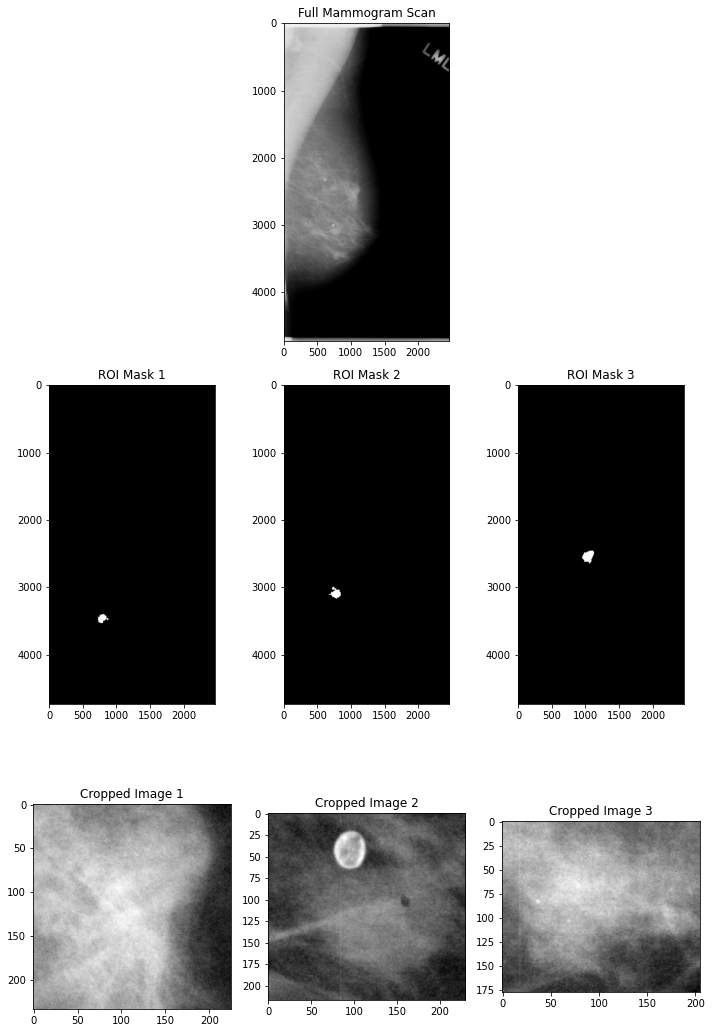

In [71]:
P00207_dcm = pydicom.dcmread("../data/raw_data/Mass/Train/Mass-Training_P_00207_LEFT_MLO_FULL.dcm")
P00207_crop1_dcm = pydicom.dcmread("../data/raw_data/Mass/Train/Mass-Training_P_00207_LEFT_MLO_CROP_3.dcm")
P00207_crop2_dcm = pydicom.dcmread("../data/raw_data/Mass/Train/Mass-Training_P_00207_LEFT_MLO_CROP_2.dcm")
P00207_crop3_dcm = pydicom.dcmread("../data/raw_data/Mass/Train/Mass-Training_P_00207_LEFT_MLO_CROP_1.dcm")
P00207_mask1_dcm = pydicom.dcmread("../data/raw_data/Mass/Train/Mass-Training_P_00207_LEFT_MLO_MASK_1.dcm")
P00207_mask2_dcm = pydicom.dcmread("../data/raw_data/Mass/Train/Mass-Training_P_00207_LEFT_MLO_MASK_2.dcm")
P00207_mask3_dcm = pydicom.dcmread("../data/raw_data/Mass/Train/Mass-Training_P_00207_LEFT_MLO_MASK_3.dcm")

P00207_arr = P00207_dcm.pixel_array
P00207_crop1_arr = P00207_crop1_dcm.pixel_array
P00207_crop2_arr = P00207_crop2_dcm.pixel_array
P00207_crop3_arr = P00207_crop3_dcm.pixel_array
P00207_mask1_arr = P00207_mask1_dcm.pixel_array
P00207_mask2_arr = P00207_mask2_dcm.pixel_array
P00207_mask3_arr = P00207_mask3_dcm.pixel_array

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 15))

ax[0][1].imshow(P00207_arr, cmap="gray")
ax[1][0].imshow(P00207_mask1_arr, cmap="gray")
ax[1][1].imshow(P00207_mask2_arr, cmap="gray")
ax[1][2].imshow(P00207_mask3_arr, cmap="gray")
ax[2][0].imshow(P00207_crop1_arr, cmap="gray")
ax[2][1].imshow(P00207_crop2_arr, cmap="gray")
ax[2][2].imshow(P00207_crop3_arr, cmap="gray")

ax[0][0].axis('off')
ax[0][2].axis('off')

ax[0][1].set_title("Full Mammogram Scan")
ax[1][0].set_title("ROI Mask 1")
ax[1][1].set_title("ROI Mask 2")
ax[1][2].set_title("ROI Mask 3")
ax[2][0].set_title("Cropped Image 1")
ax[2][1].set_title("Cropped Image 2")
ax[2][2].set_title("Cropped Image 3")

plt.tight_layout()
plt.savefig("/Users/cleonwong/Google Drive/To-Share/mammogram_medium_article/Part1/more_than_one_abnorm_example_P00207.png", dpi=300, transparent=True)

### Pathology

<AxesSubplot:xlabel='abnormality_type'>

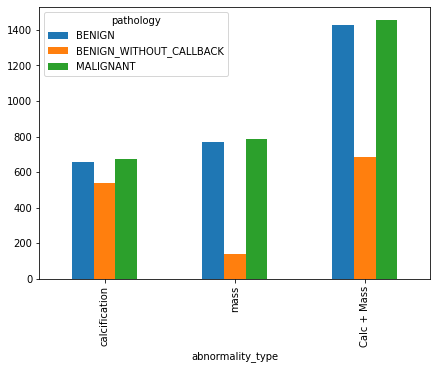

In [152]:
plot_df = all_df.groupby(["abnormality_type"])["pathology"].value_counts().unstack()
new_row = plot_df.loc["calcification"] + plot_df.loc["mass"]
new_row.name = "Calc + Mass"
plot_df = plot_df.append(new_row, ignore_index=False)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
plot_df.plot.bar(ax=ax)

### Pathology and abnormality type

In [289]:
path_ab_dict = {
    "benign-calc":0,
    "benign-mass":0,
    "malignant-calc":0,
    "malignant-mass":0
}

for row in all_df.itertuples():
    
    pathology = row.pathology
    ab_type = row.abnormality_type
    
    if pathology=="BENIGN" and ab_type=="calcification":
        path_ab_dict["benign-calc"] += 1
    elif pathology=="BENIGN" and ab_type=="mass":
        path_ab_dict["benign-mass"] += 1
    elif pathology=="MALIGNANT" and ab_type=="calcification":
        path_ab_dict["malignant-calc"] += 1
    elif pathology=="MALIGNANT" and ab_type=="mass":
        path_ab_dict["malignant-mass"] += 1

In [293]:
path_ab_df = pd.DataFrame.from_dict(data=path_ab_dict, orient="index")
path_ab_df

,0
benign-calc,658
benign-mass,771
malignant-calc,673
malignant-mass,784


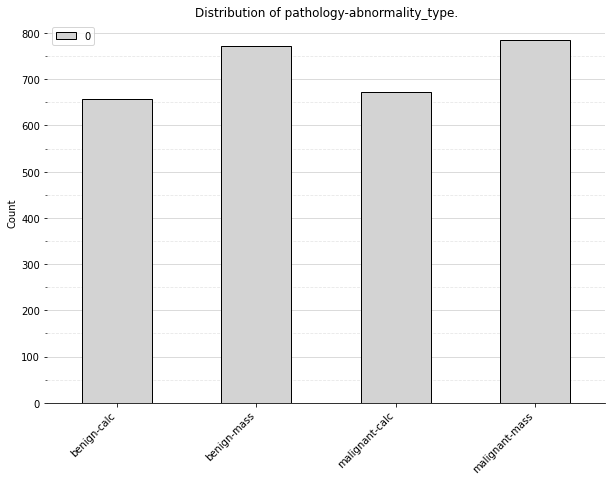

In [299]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Plot bars one by one in order to set the colours.
path_ab_df.plot.bar(ax=ax, color="#d3d3d3", edgecolor="black")
    
ax.set_title("Distribution of pathology-abnormality_type.")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(b=True, which="major", axis="y", color="#d3d3d3", linestyle="-")
ax.grid(b=True, which="minor", axis="y", color="#e7e7e7", linestyle="dashed")
ax.set_ylabel("Count")
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha="right")
ax.yaxis.set_ticks(np.arange(0, 850, 100))
ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.patch.set_alpha(0)
ax.set_axisbelow(True)


### Density


<AxesSubplot:xlabel='abnormality_type'>

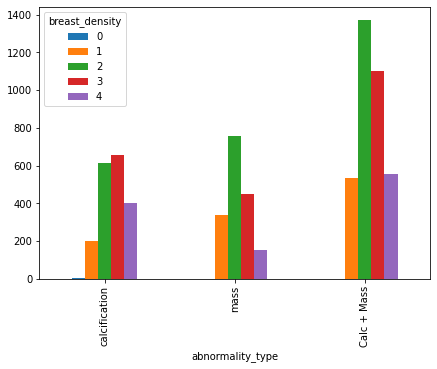

In [282]:
plot_df = all_df.groupby(["abnormality_type"])["breast_density"].value_counts().unstack()
new_row = plot_df.loc["calcification"] + plot_df.loc["mass"]
new_row.name = "Calc + Mass"
plot_df = plot_df.append(new_row, ignore_index=False)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
plot_df.plot.bar(ax=ax)

In [357]:
all_df[(all_df["breast_density"]==4) & (all_df["abnormality_type"]=="calcification")].head(30)

,identifier,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc_type,calc_distribution,assessment,pathology,subtlety,mass_shape,mass_margins
2,P_00007_LEFT_CC,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,NaN,NaN
3,P_00007_LEFT_MLO,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,NaN,NaN
26,P_00013_RIGHT_MLO,P_00013,4,RIGHT,MLO,1,calcification,PLEOMORPHIC,SEGMENTAL,4,BENIGN,4,NaN,NaN
27,P_00014_LEFT_CC,P_00014,4,LEFT,CC,1,calcification,PLEOMORPHIC,CLUSTERED,4,MALIGNANT,4,NaN,NaN
28,P_00014_LEFT_MLO,P_00014,4,LEFT,MLO,1,calcification,PLEOMORPHIC,CLUSTERED,4,MALIGNANT,4,NaN,NaN
29,P_00016_LEFT_CC,P_00016,4,LEFT,CC,2,calcification,PLEOMORPHIC,CLUSTERED,5,MALIGNANT,5,NaN,NaN
30,P_00016_LEFT_MLO,P_00016,4,LEFT,MLO,2,calcification,PLEOMORPHIC,CLUSTERED,5,MALIGNANT,5,NaN,NaN
31,P_00019_RIGHT_MLO,P_00019,4,RIGHT,MLO,1,calcification,PLEOMORPHIC,CLUSTERED,4,BENIGN,2,NaN,NaN
32,P_00019_RIGHT_CC,P_00019,4,RIGHT,CC,1,calcification,PLEOMORPHIC,CLUSTERED,4,BENIGN,2,NaN,NaN
37,P_00024_LEFT_CC,P_00024,4,LEFT,CC,1,calcification,PUNCTATE,CLUSTERED,4,BENIGN,2,NaN,NaN


In [358]:
density_1 = [
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00008_LEFT_CC_FULL.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00048_RIGHT_MLO_FULL.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00271_LEFT_CC_FULL.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Mass/Train_extracted/Mass-Training_P_00021_LEFT_CC_FULL.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Mass/Train_extracted/Mass-Training_P_00080_RIGHT_MLO_FULL.dcm"
]
density_1_ds = [pydicom.dcmread(path) for path in density_1]
density_1_arr = [_ds.pixel_array for _ds in density_1_ds]


density_2 = [
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Mass/Train_extracted/Mass-Training_P_00018_RIGHT_CC_FULL.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Mass/Train_extracted/Mass-Training_P_00051_LEFT_MLO_FULL.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Mass/Train_extracted/Mass-Training_P_00079_RIGHT_CC_FULL.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00012_LEFT_CC_FULL.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00159_LEFT_MLO_FULL.dcm"
]
density_2_ds = [pydicom.dcmread(path) for path in density_2]
density_2_arr = [_ds.pixel_array for _ds in density_2_ds]


density_3 = [
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00005_RIGHT_CC_FULL.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00084_LEFT_CC_FULL.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00105_LEFT_CC_FULL.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Mass/Train_extracted/Mass-Training_P_00068_RIGHT_CC_FULL.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Mass/Train_extracted/Mass-Training_P_00134_LEFT_CC_FULL.dcm"
]
density_3_ds = [pydicom.dcmread(path) for path in density_3]
density_3_arr = [_ds.pixel_array for _ds in density_3_ds]


density_4 = [
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Mass/Train_extracted/Mass-Training_P_00045_LEFT_CC_FULL.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Mass/Train_extracted/Mass-Training_P_00172_LEFT_CC_FULL.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Mass/Train_extracted/Mass-Training_P_00444_LEFT_CC_FULL.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00031_LEFT_CC_FULL.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00181_RIGHT_MLO_FULL.dcm"
]
density_4_ds = [pydicom.dcmread(path) for path in density_4]
density_4_arr = [_ds.pixel_array for _ds in density_4_ds]

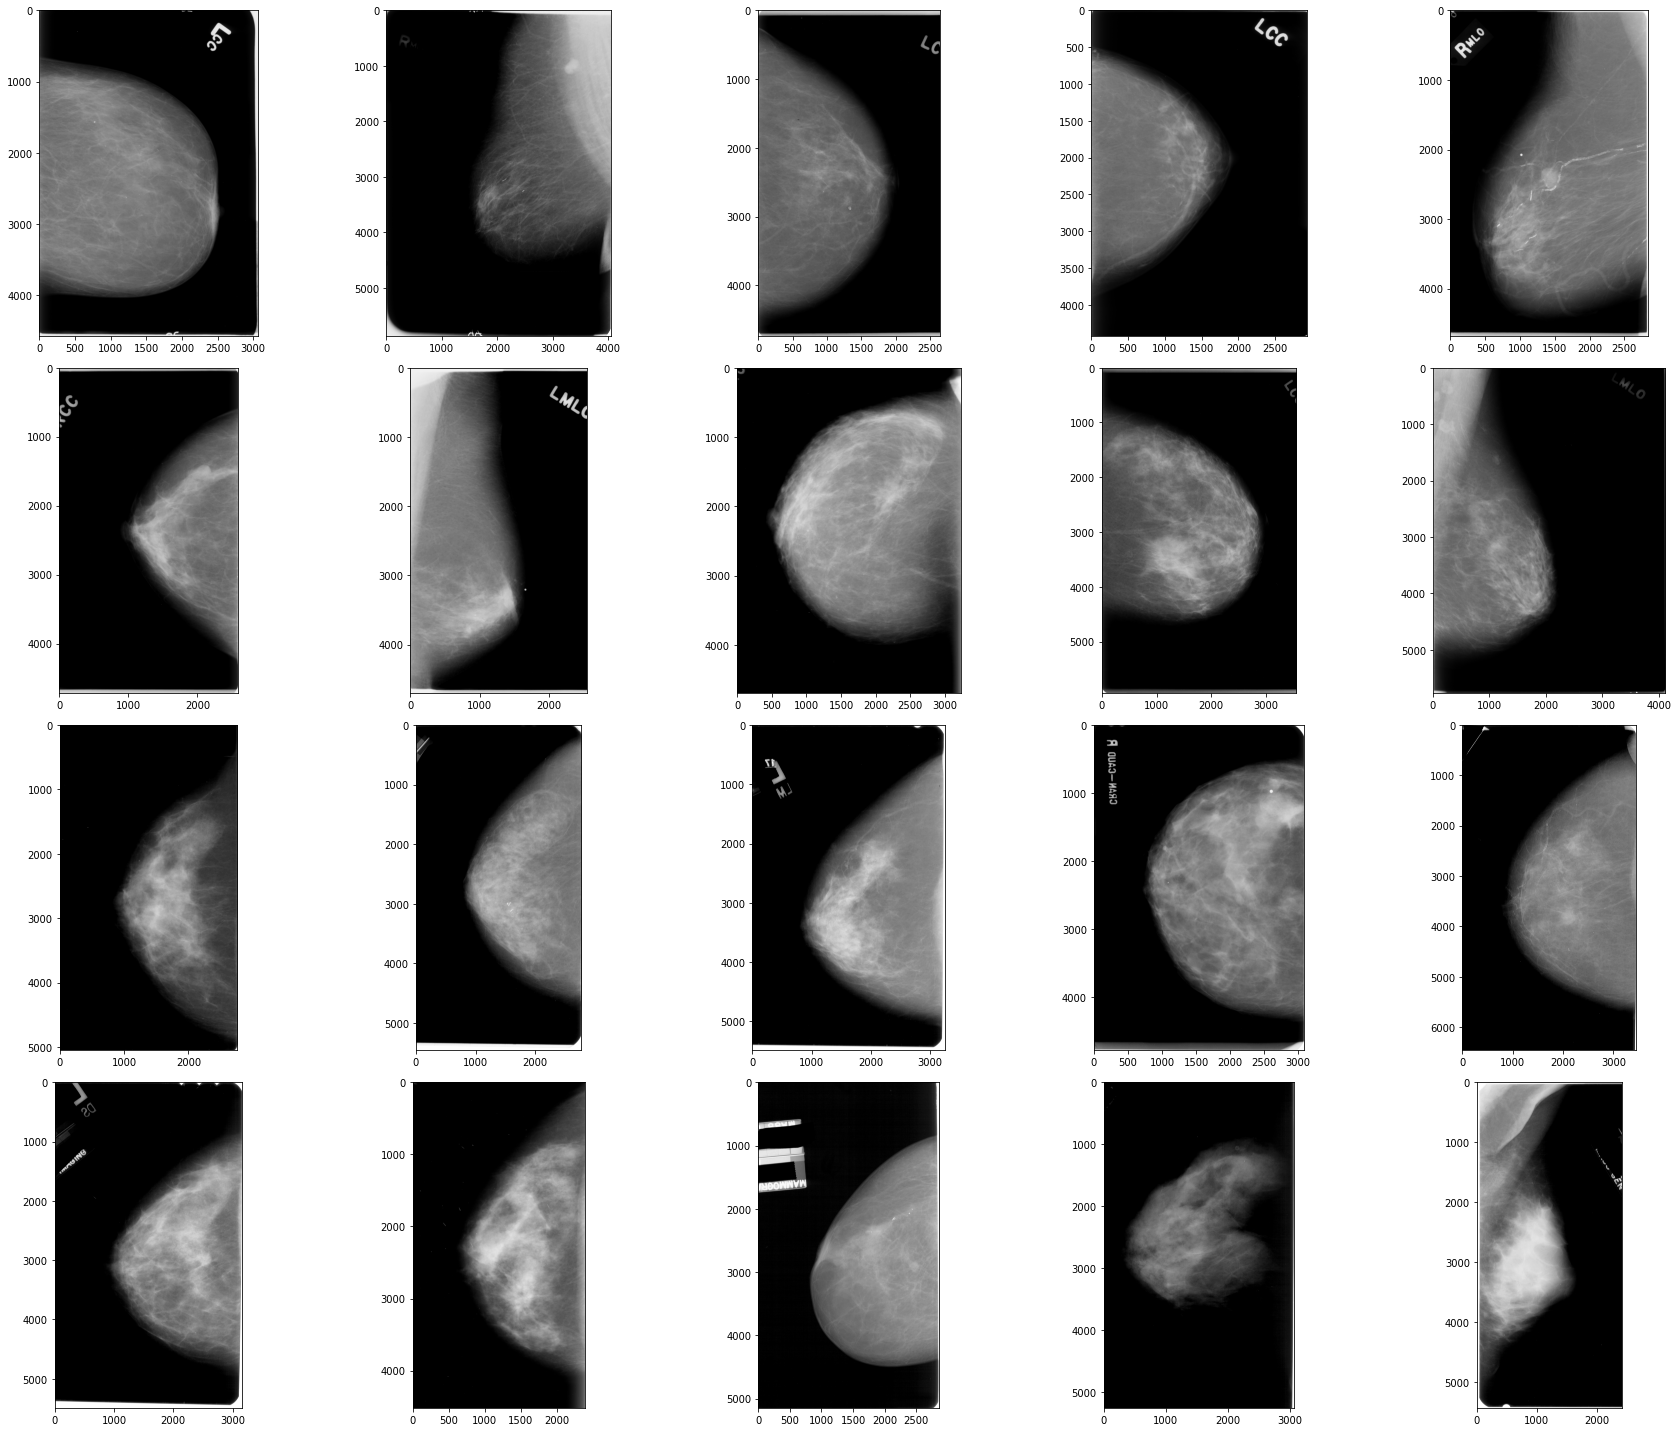

In [360]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(25, 20))

for i in range(5):
    ax[0][i].imshow(density_1_arr[i], cmap="gray")
    ax[1][i].imshow(density_2_arr[i], cmap="gray")
    ax[2][i].imshow(density_3_arr[i], cmap="gray")
    ax[3][i].imshow(density_4_arr[i], cmap="gray")
    
plt.tight_layout()

### Density vs. pathology

In [59]:
calc_all_df["breast_density"].value_counts()

3    654
2    616
4    401
1    199
0      2
Name: breast_density, dtype: int64

In [60]:
mass_all_df["breast_density"].value_counts()

2    757
3    449
1    337
4    153
Name: breast_density, dtype: int64

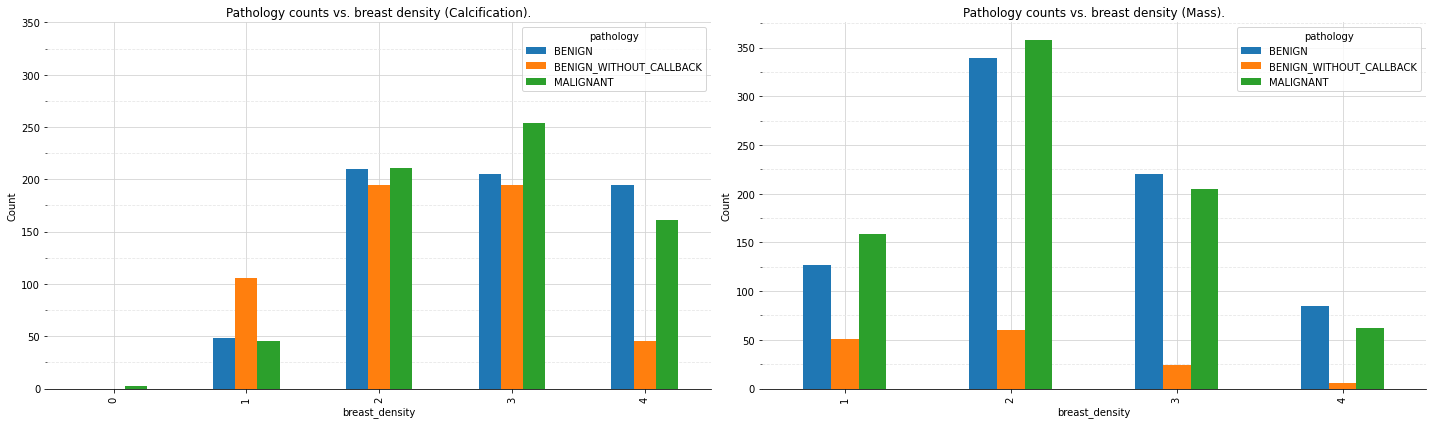

In [85]:
calc_plot = calc_all_df.groupby(["breast_density"])["pathology"].value_counts().unstack()
mass_plot = mass_all_df.groupby(["breast_density"])["pathology"].value_counts().unstack()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
calc_plot.plot.bar(ax=ax[0])
mass_plot.plot.bar(ax=ax[1])

ax[0].set_title("Pathology counts vs. breast density (Calcification).")
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].grid(b=True, which="major", axis="both", color="#d3d3d3", linestyle="-")
ax[0].grid(b=True, which="minor", axis="y", color="#e7e7e7", linestyle="dashed")
ax[0].set_ylabel("Count")
ax[0].yaxis.set_ticks(np.arange(0, 400, 50))
ax[0].yaxis.set_minor_locator(MultipleLocator(25))
ax[0].patch.set_alpha(0)
ax[0].set_axisbelow(True)

ax[1].set_title("Pathology counts vs. breast density (Mass).")
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].grid(b=True, which="major", axis="both", color="#d3d3d3", linestyle="-")
ax[1].grid(b=True, which="minor", axis="y", color="#e7e7e7", linestyle="dashed")
ax[1].set_ylabel("Count")
ax[1].yaxis.set_ticks(np.arange(0, 400, 50))
ax[1].yaxis.set_minor_locator(MultipleLocator(25))
ax[1].patch.set_alpha(0)
ax[1].set_axisbelow(True)

plt.tight_layout()

### Mass vs pathology

### Mass shapes

In [224]:
mass_shapes = [shape for shape in mass_all_df["mass_shape"].unique() if str(shape) != "nan"]
mass_shapes

['IRREGULAR-ARCHITECTURAL_DISTORTION',
 'ARCHITECTURAL_DISTORTION',
 'OVAL',
 'IRREGULAR',
 'LYMPH_NODE',
 'LOBULATED-LYMPH_NODE',
 'LOBULATED',
 'FOCAL_ASYMMETRIC_DENSITY',
 'ROUND',
 'LOBULATED-ARCHITECTURAL_DISTORTION',
 'ASYMMETRIC_BREAST_TISSUE',
 'LOBULATED-IRREGULAR',
 'OVAL-LYMPH_NODE',
 'LOBULATED-OVAL',
 'ROUND-OVAL',
 'IRREGULAR-FOCAL_ASYMMETRIC_DENSITY',
 'ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION',
 'ROUND-LOBULATED',
 'OVAL-LOBULATED',
 'IRREGULAR-ASYMMETRIC_BREAST_TISSUE']

In [223]:
mass_all_df["mass_shape"].isnull().sum()

4

In [174]:
mass_shape_singlelabel = [shape for shape in mass_shapes if "-" not in shape]
mass_shape_singlelabel

['ARCHITECTURAL_DISTORTION',
 'OVAL',
 'IRREGULAR',
 'LYMPH_NODE',
 'LOBULATED',
 'FOCAL_ASYMMETRIC_DENSITY',
 'ROUND',
 'ASYMMETRIC_BREAST_TISSUE']

<ipython-input-328-50bfd8f78933>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=plot_df.index, rotation=45, ha="right")


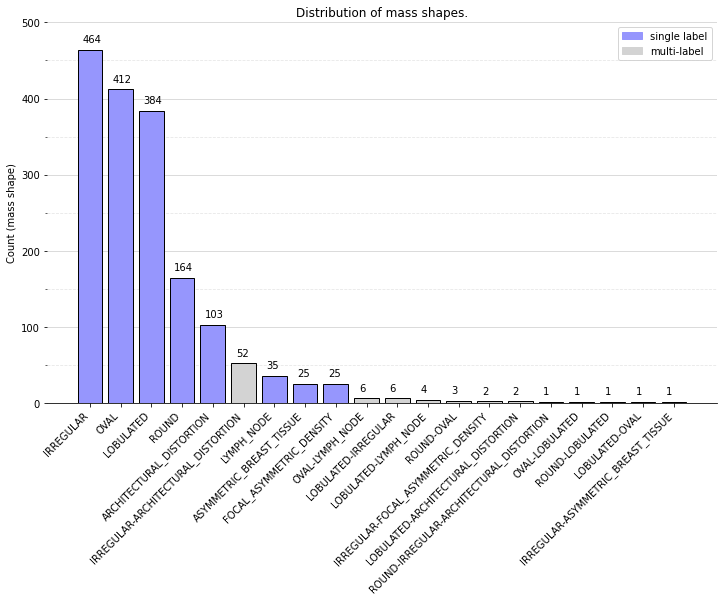

In [328]:
plot_df = mass_all_df["mass_shape"].value_counts().to_frame()

# Create colour dictionary
color_dict = dict((shape, "#d3d3d3") for shape in mass_shapes)
for k, v in color_dict.items():
    if k in mass_shape_singlelabel:
        color_dict[k] = "#9696fd"

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

# Plot bars one by one in order to set the colours.
for row in plot_df.itertuples():
    ax.bar(x=row.Index, height=row.mass_shape, color=color_dict[row.Index], edgecolor="black")

# Plot values
for i, v in enumerate(plot_df["mass_shape"]):
    ax.text(x=(i-0.25), y=(v + 10), s=str(v), color="black")
    
ax.set_title("Distribution of mass shapes.")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(b=True, which="major", axis="y", color="#d3d3d3", linestyle="-")
ax.grid(b=True, which="minor", axis="y", color="#e7e7e7", linestyle="dashed")
ax.set_ylabel("Count (mass shape)")
ax.set_xticklabels(labels=plot_df.index, rotation=45, ha="right")
ax.yaxis.set_ticks(np.arange(0, 550, 100))
ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.patch.set_alpha(0)
ax.set_axisbelow(True)

# Add legend
colors = {"single label": "#9696fd", "multi-label":"#d3d3d3"}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax.legend(handles, labels)

# Get axis for next plot
x_labels = list(plot_df.index)

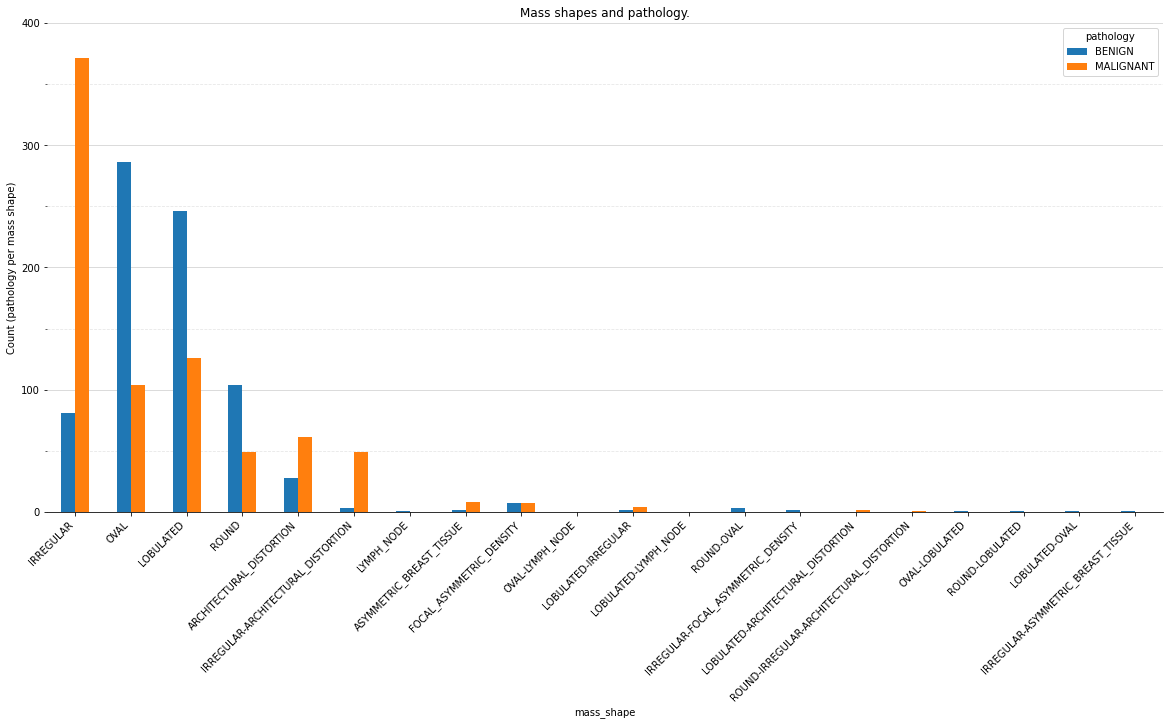

In [327]:
plot_df = mass_all_df.groupby(["mass_shape"])["pathology"].value_counts().unstack()
plot_df.drop(columns=["BENIGN_WITHOUT_CALLBACK"], inplace=True)
plot_df = plot_df.reindex(x_labels)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 9))
plot_df.plot.bar(ax=ax)

ax.set_title("Mass shapes and pathology.")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(b=True, which="major", axis="y", color="#d3d3d3", linestyle="-")
ax.grid(b=True, which="minor", axis="y", color="#e7e7e7", linestyle="dashed")
ax.set_ylabel("Count (pathology per mass shape)")
ax.set_xticklabels(labels=plot_df.index, rotation=45, ha="right")
ax.yaxis.set_ticks(np.arange(0, 450, 100))
ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.patch.set_alpha(0)
ax.set_axisbelow(True)

### Calc type

In [227]:
calc_types = [calc for calc in calc_all_df["calc_type"].unique() if str(calc) != "nan"]
calc_types

['AMORPHOUS',
 'PLEOMORPHIC',
 'ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC',
 'PUNCTATE',
 'COARSE',
 'VASCULAR',
 'FINE_LINEAR_BRANCHING',
 'LARGE_RODLIKE',
 'PUNCTATE-LUCENT_CENTER',
 'VASCULAR-COARSE-LUCENT_CENTER-ROUND_AND_REGULAR-PUNCTATE',
 'ROUND_AND_REGULAR-EGGSHELL',
 'PUNCTATE-PLEOMORPHIC',
 'PLEOMORPHIC-FINE_LINEAR_BRANCHING',
 'DYSTROPHIC',
 'LUCENT_CENTER',
 'AMORPHOUS-PLEOMORPHIC',
 'ROUND_AND_REGULAR',
 'VASCULAR-COARSE-LUCENT_CENTERED',
 'COARSE-ROUND_AND_REGULAR',
 'COARSE-PLEOMORPHIC',
 'LUCENT_CENTERED',
 'VASCULAR-COARSE',
 'ROUND_AND_REGULAR-PUNCTATE',
 'ROUND_AND_REGULAR-LUCENT_CENTER',
 'COARSE-ROUND_AND_REGULAR-LUCENT_CENTERED',
 'SKIN',
 'LUCENT_CENTER-PUNCTATE',
 'SKIN-PUNCTATE',
 'SKIN-PUNCTATE-ROUND_AND_REGULAR',
 'MILK_OF_CALCIUM',
 'PLEOMORPHIC-PLEOMORPHIC',
 'SKIN-COARSE-ROUND_AND_REGULAR',
 'AMORPHOUS-ROUND_AND_REGULAR',
 'ROUND_AND_REGULAR-PLEOMORPHIC',
 'ROUND_AND_REGULAR-PUNCTATE-AMORPHOUS',
 'ROUND_AND_REGULAR-AMORPHOUS',
 'COARSE-ROUND_AND_REGULAR-L

In [226]:
calc_all_df["calc_type"].isnull().sum()

24

In [228]:
calc_type_singlelabel = [calc for calc in calc_types if "-" not in calc]
calc_type_singlelabel

['AMORPHOUS',
 'PLEOMORPHIC',
 'PUNCTATE',
 'COARSE',
 'VASCULAR',
 'FINE_LINEAR_BRANCHING',
 'LARGE_RODLIKE',
 'DYSTROPHIC',
 'LUCENT_CENTER',
 'ROUND_AND_REGULAR',
 'LUCENT_CENTERED',
 'SKIN',
 'MILK_OF_CALCIUM',
 'EGGSHELL']

<ipython-input-246-afd101d1ad3a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=plot_df.index, rotation=90, ha="center")


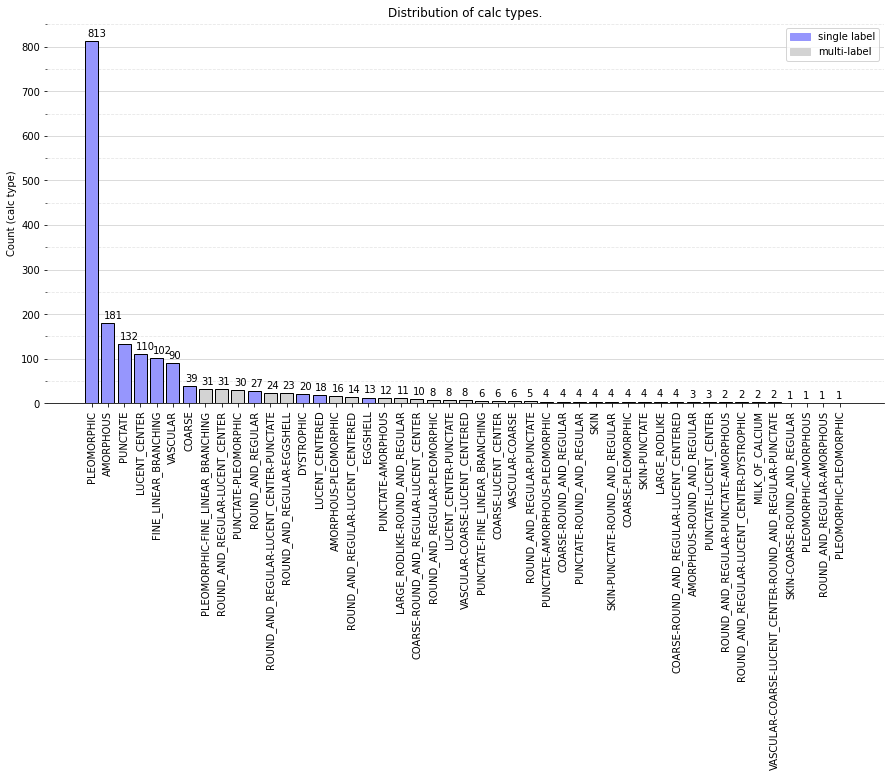

In [246]:
plot_df = calc_all_df["calc_type"].value_counts().to_frame()


# Create colour dictionary
color_dict = dict((calc, "#d3d3d3") for calc in calc_types)
for k, v in color_dict.items():
    if k in calc_type_singlelabel:
        color_dict[k] = "#9696fd"

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

# Plot bars one by one in order to set the colours.
for row in plot_df.itertuples():
    ax.bar(x=row.Index, height=row.calc_type, color=color_dict[row.Index], edgecolor="black")

# Plot values
for i, v in enumerate(plot_df["calc_type"]):
    ax.text(x=(i-0.25), y=(v + 10), s=str(v), color="black")
    
ax.set_title("Distribution of calc types.")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(b=True, which="major", axis="y", color="#d3d3d3", linestyle="-")
ax.grid(b=True, which="minor", axis="y", color="#e7e7e7", linestyle="dashed")
ax.set_ylabel("Count (calc type)")
ax.set_xticklabels(labels=plot_df.index, rotation=90, ha="center")
ax.yaxis.set_ticks(np.arange(0, 850, 100))
ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.patch.set_alpha(0)
ax.set_axisbelow(True)

# Add legend
colors = {"single label": "#9696fd", "multi-label":"#d3d3d3"}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax.legend(handles, labels)

### Calc distribution

In [250]:
calc_dists = [dist for dist in calc_all_df["calc_distribution"].unique() if str(dist) != "nan"]
calc_dists

['CLUSTERED',
 'LINEAR',
 'REGIONAL',
 'DIFFUSELY_SCATTERED',
 'SEGMENTAL',
 'CLUSTERED-LINEAR',
 'CLUSTERED-SEGMENTAL',
 'LINEAR-SEGMENTAL',
 'REGIONAL-REGIONAL']

In [236]:
calc_all_df["calc_distribution"].isnull().sum()

439

In [252]:
calc_dist_singlelabel = [dist for dist in calc_dists if "-" not in dist]
calc_dist_singlelabel

['CLUSTERED', 'LINEAR', 'REGIONAL', 'DIFFUSELY_SCATTERED', 'SEGMENTAL']

<ipython-input-257-585e7d26d8ff>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=plot_df.index, rotation=90, ha="center")


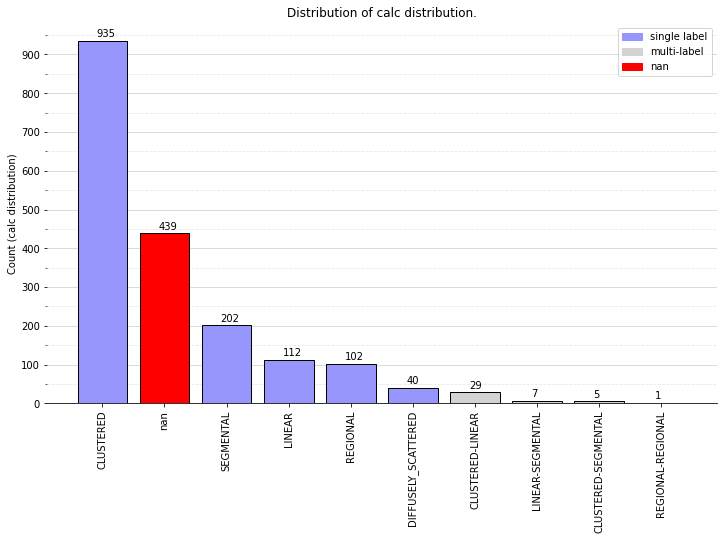

In [257]:
plot_df = calc_all_df["calc_distribution"].value_counts().to_frame()
plot_df.loc["nan"] = calc_all_df["calc_distribution"].isnull().sum()
plot_df.sort_values(by=["calc_distribution"], ascending=False, inplace=True)

# Create colour dictionary
color_dict = dict((dist, "#d3d3d3") for dist in calc_dists)
color_dict["nan"] = "red"
for k, v in color_dict.items():
    if k in calc_dist_singlelabel:
        color_dict[k] = "#9696fd"
        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

# Plot bars one by one in order to set the colours.
for row in plot_df.itertuples():
    ax.bar(x=row.Index, height=row.calc_distribution, color=color_dict[row.Index], edgecolor="black")

# Plot values
for i, v in enumerate(plot_df["calc_distribution"]):
    ax.text(x=(i-0.1), y=(v + 10), s=str(v), color="black")
    
ax.set_title("Distribution of calc distribution.")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(b=True, which="major", axis="y", color="#d3d3d3", linestyle="-")
ax.grid(b=True, which="minor", axis="y", color="#e7e7e7", linestyle="dashed")
ax.set_ylabel("Count (calc distribution)")
ax.set_xticklabels(labels=plot_df.index, rotation=90, ha="center")
ax.yaxis.set_ticks(np.arange(0, 950, 100))
ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.patch.set_alpha(0)
ax.set_axisbelow(True)

# Add legend
colors = {"single label": "#9696fd", "multi-label":"#d3d3d3", "nan": "red"}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax.legend(handles, labels)

### Visualising P_00034 calc and mass

In [110]:
calc_path_00034 = [
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00034_RIGHT_CC_FULL.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00034_RIGHT_CC_CROP_2.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00034_RIGHT_CC_MASK_2.dcm"
]

mass_path_00034 = [
"/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Mass/Train_extracted/Mass-Training_P_00034_RIGHT_CC_FULL.dcm",
"/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Mass/Train_extracted/Mass-Training_P_00034_RIGHT_CC_CROP_1.dcm",
"/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Mass/Train_extracted/Mass-Training_P_00027_RIGHT_MLO_MASK_1.dcm"

    
]

calc_ds = [pydicom.dcmread(calc_path_00034[i]) for i in range(len(calc_path_00034))]
mass_ds = [pydicom.dcmread(mass_path_00034[i]) for i in range(len(mass_path_00034))]

calc_arr = [_ds.pixel_array for _ds in calc_ds]
mass_arr = [_ds.pixel_array for _ds in mass_ds]


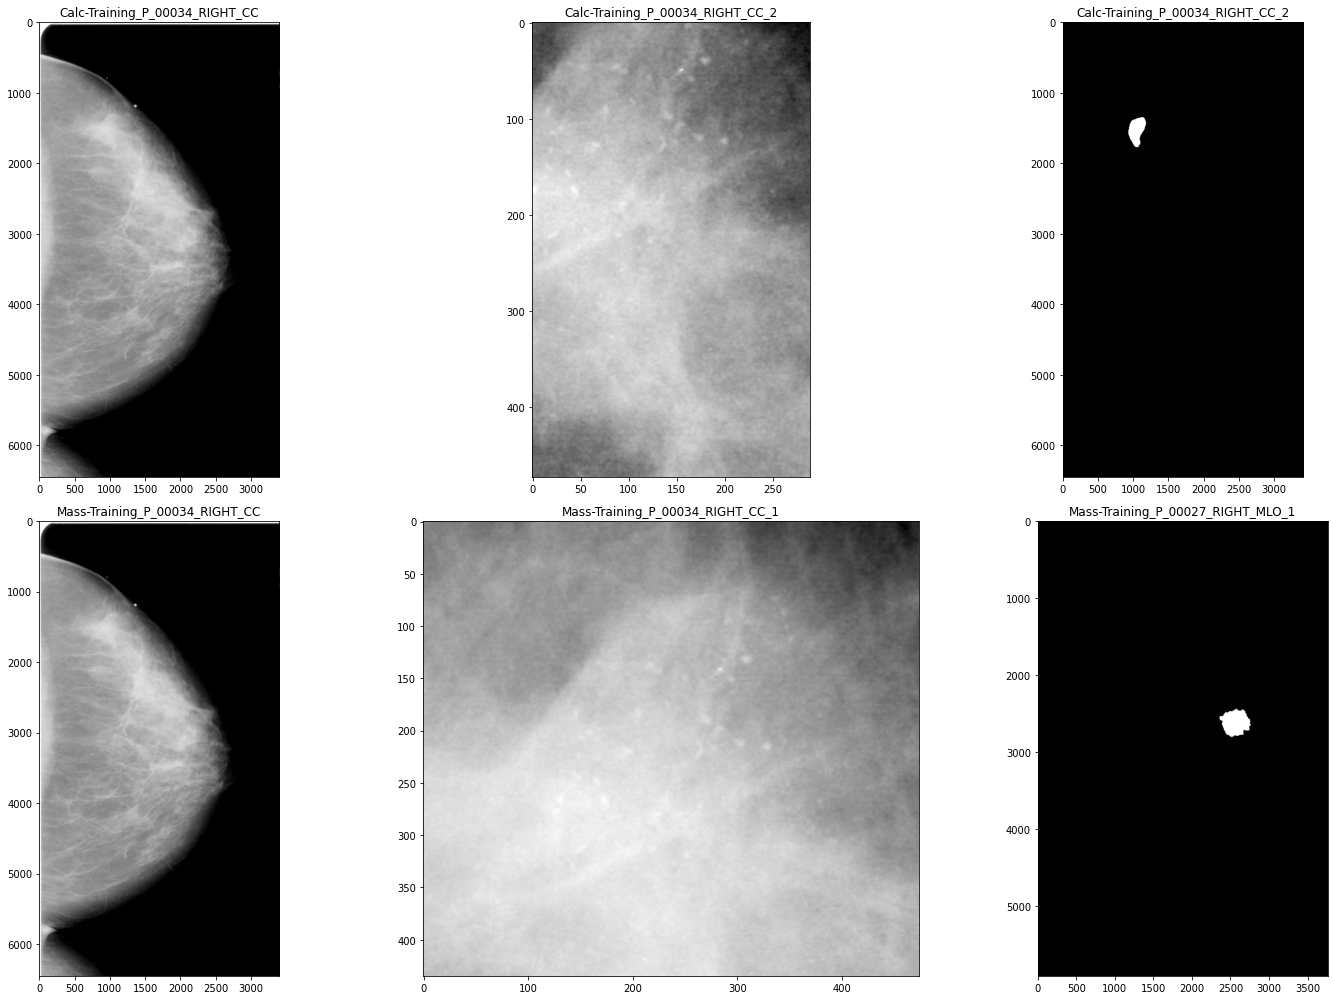

In [111]:
# Plot together
fig, ax = plt.sulots(nrows=2, ncols=3, figsize = (22, 14))

for i in range(3):
    ax[0][i].imshow(calc_arr[i], cmap="gray")
    ax[0][i].set_title(f"{calc_ds[i].PatientID}")
    
    ax[1][i].imshow(mass_arr[i], cmap="gray")
    ax[1][i].set_title(f"{mass_ds[i].PatientID}")
    
plt.tight_layout()

### Visualising identifiers with more than 1 calc
#### P_00112_RIGHT_MLO

In [258]:
calc_all_df["identifier"].value_counts()

P_00112_RIGHT_MLO    7
P_01838_LEFT_MLO     7
P_01099_LEFT_CC      6
P_01408_LEFT_CC      6
P_01437_LEFT_MLO     6
                    ..
P_00753_LEFT_CC      1
P_00534_RIGHT_MLO    1
P_02475_LEFT_MLO     1
P_01700_RIGHT_CC     1
P_01037_LEFT_CC      1
Name: identifier, Length: 1511, dtype: int64

In [259]:
calc_path_full_00112 =     "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_FULL.dcm"

calc_path_crop_00112 = [
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_CROP_1.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_CROP_2.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_CROP_3.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_CROP_4.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_CROP_5.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_CROP_6.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_CROP_7.dcm"
]

calc_path_mask_00112 = [
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_MASK_1.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_MASK_2.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_MASK_3.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_MASK_4.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_MASK_5.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_MASK_6.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_00112_RIGHT_MLO_MASK_7.dcm"
]

In [261]:
calc_crop_ds = [pydicom.dcmread(calc_path_crop_00112[i]) for i in range(len(calc_path_crop_00112))]
calc_mask_ds = [pydicom.dcmread(calc_path_mask_00112[i]) for i in range(len(calc_path_mask_00112))]
calc_full_ds = pydicom.dcmread(calc_path_full_00112)

calc_crop_arr = [_ds.pixel_array for _ds in calc_crop_ds]
calc_mask_arr = [_ds.pixel_array for _ds in calc_mask_ds]
calc_full_arr = calc_full_ds.pixel_array

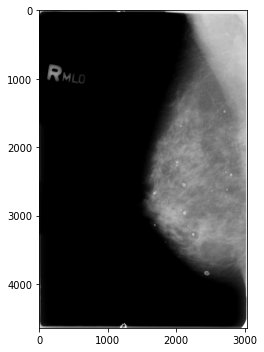

In [270]:
# Plot full
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (5, 5))

ax.imshow(calc_full_arr, cmap="gray")

plt.tight_layout()

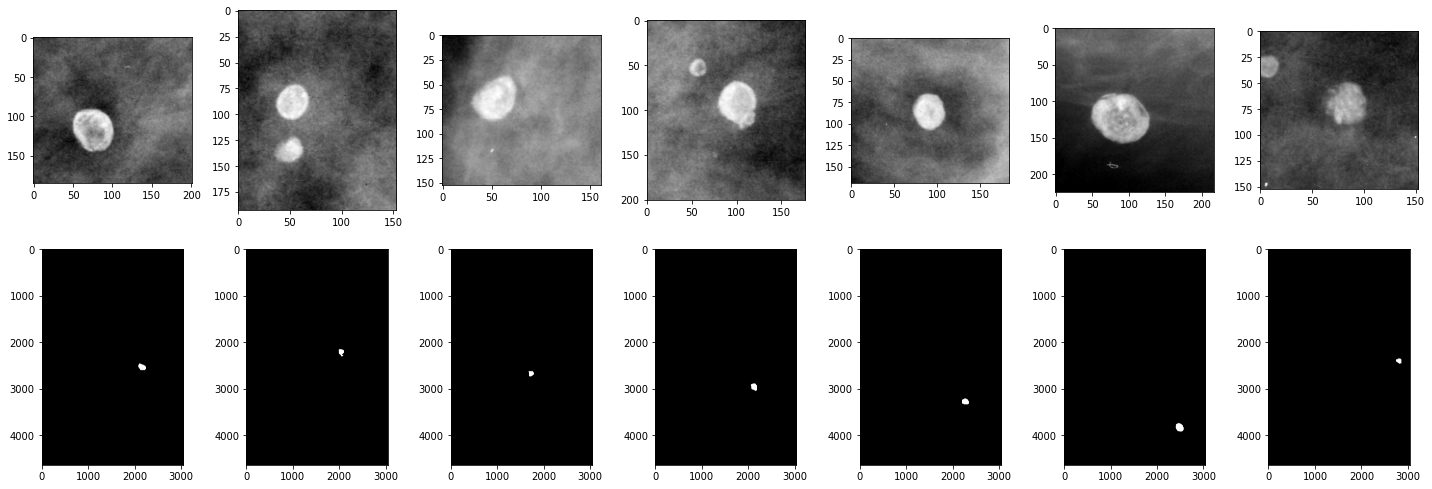

In [269]:
# Plot together
fig, ax = plt.subplots(nrows=2, ncols=7, figsize = (20, 7))


for i in range(len(calc_crop_ds)):
    ax[0][i].imshow(calc_crop_arr[i], cmap="gray")
    ax[1][i].imshow(calc_mask_arr[i], cmap="gray")

plt.tight_layout()

#### P_01838_LEFT_MLO

In [271]:
calc_path_full_01838 = "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_01838_LEFT_MLO_FULL.dcm"

calc_path_crop_01838 = [
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_01838_LEFT_MLO_CROP_1.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_01838_LEFT_MLO_CROP_2.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_01838_LEFT_MLO_CROP_3.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_01838_LEFT_MLO_CROP_4.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_01838_LEFT_MLO_CROP_5.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_01838_LEFT_MLO_CROP_6.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_01838_LEFT_MLO_CROP_7.dcm"
]

calc_path_mask_01838 = [
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_01838_LEFT_MLO_MASK_1.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_01838_LEFT_MLO_MASK_2.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_01838_LEFT_MLO_MASK_3.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_01838_LEFT_MLO_MASK_4.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_01838_LEFT_MLO_MASK_5.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_01838_LEFT_MLO_MASK_6.dcm",
    "/Users/cleonwong/Dropbox (Holmusk)/mammogram-cv/CBIS-DDSM/Calc/Train/Calc-Training_P_01838_LEFT_MLO_MASK_7.dcm"
]

In [272]:
calc_crop_ds = [pydicom.dcmread(calc_path_crop_01838[i]) for i in range(len(calc_path_crop_01838))]
calc_mask_ds = [pydicom.dcmread(calc_path_mask_01838[i]) for i in range(len(calc_path_mask_01838))]
calc_full_ds = pydicom.dcmread(calc_path_full_01838)

calc_crop_arr = [_ds.pixel_array for _ds in calc_crop_ds]
calc_mask_arr = [_ds.pixel_array for _ds in calc_mask_ds]
calc_full_arr = calc_full_ds.pixel_array

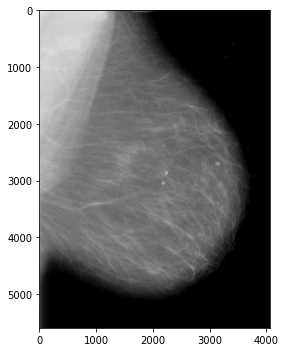

In [273]:
# Plot full
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (5, 5))

ax.imshow(calc_full_arr, cmap="gray")

plt.tight_layout()

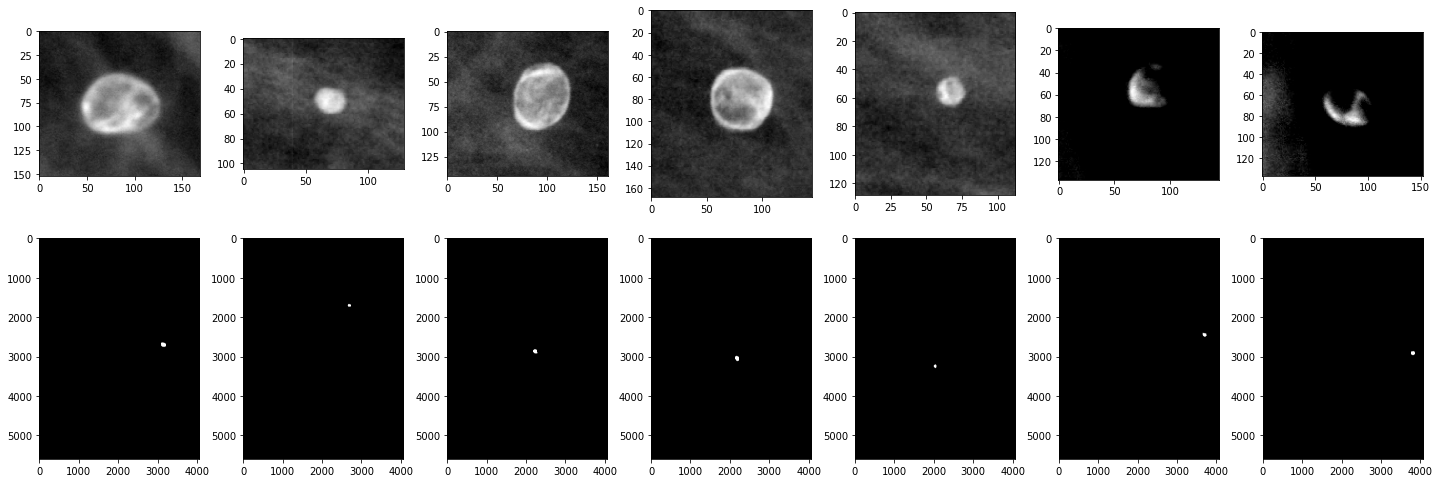

In [274]:
# Plot together
fig, ax = plt.subplots(nrows=2, ncols=7, figsize = (20, 7))


for i in range(len(calc_crop_ds)):
    ax[0][i].imshow(calc_crop_arr[i], cmap="gray")
    ax[1][i].imshow(calc_mask_arr[i], cmap="gray")

plt.tight_layout()